# #Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:
1.	Pre-process the dataset.
2.	Identify outliers.
3.	Check the correlation.
4.	Implement linear regression and random forest regression models.
5.	Evaluate the models and compare their respective scores like R2, RMSE, etc. Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset


In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset
df  = pd.read_csv("/content/uber.csv")

##  1.	Pre-process the dataset.

In [ ]:
df.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [ ]:
df.info() #To get the required information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df.columns #TO get number of columns in the dataset

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1) #To drop unnamed column as it isn't required

In [ ]:
df.head()

fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1          7.7  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2         12.9  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3          5.3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4         16.0  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [ ]:
df.shape #To get the total (Rows,Columns)

(200000, 7)

In [ ]:
df.dtypes #To get the type of each column

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [ ]:
df.describe() #To get statistics of each columns 

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  200000.000000     200000.000000    200000.000000      199999.000000   
mean       11.359955        -72.527638        39.935885         -72.525292   
std         9.901776         11.437787         7.720539          13.117408   
min       -52.000000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991407   
50%         8.500000        -73.981823        40.752592         -73.980093   
75%        12.500000        -73.967154        40.767158         -73.963658   
max       499.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count  
count     199999.000000    200000.000000  
mean          39.923890         1.684535  
std            6.794829         1.385997  
min         -881.985513         0.000000  
25%           40.733823         1.000000  
50%           40.753042         1.000000  
75%           40.768001         2.000000  
max          872.697628       208.000000

### Filling Missing values

In [ ]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [ ]:
df['dropoff_latitude']

0         40.723217
1         40.750325
2         40.772647
3         40.803349
4         40.761247
            ...    
199995    40.740297
199996    40.739620
199997    40.692588
199998    40.695415
199999    40.768793
Name: dropoff_latitude, Length: 200000, dtype: float64

In [ ]:
df.head(10)

fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1          7.7  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2         12.9  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3          5.3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4         16.0  2014-08-28 17:47:00 UTC        -73.925023        40.744085   
5          4.9  2011-02-12 02:27:09 UTC        -73.969019        40.755910   
6         24.5  2014-10-12 07:04:00 UTC        -73.961447        40.693965   
7          2.5  2012-12-11 13:52:00 UTC          0.000000         0.000000   
8          9.7  2012-02-17 09:32:00 UTC        -73.975187        40.745767   
9         12.5  2012-03-29 19:06:00 UTC        -74.001065        40.741787   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5  
5         -73.969019         40.755910                1  
6         -73.871195         40.774297                5  
7           0.000000          0.000000                1  
8         -74.002720         40.743537                1  
9         -73.963040         40.775012                1

In [ ]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Column pickup_datetime is in wrong format (Object). Convert it to DateTime Format

In [ ]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime,) 

In [ ]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

### To segregate each time of date and time

In [ ]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

In [ ]:
df.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1          7.7 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2         12.9 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3          5.3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4         16.0 2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day  month  \
0         -73.999512         40.723217                1    19    7      5   
1         -73.994710         40.750325                1    20   17      7   
2         -73.962565         40.772647                1    21   24      8   
3         -73.965316         40.803349                3     8   26      6   
4         -73.973082         40.761247                5    17   28      8   

   year  dayofweek  
0  2015          3  
1  2009          4  
2  2009          0  
3  2009          4  
4  2014          3

In [ ]:
# drop the column 'pickup_daetime' using drop()
# 'axis = 1' drops the specified column

df = df.drop('pickup_datetime',axis=1)


In [ ]:
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  
0         40.723217                1    19    7      5  2015          3  
1         40.750325                1    20   17      7  2009          4  
2         40.772647                1    21   24      8  2009          0  
3         40.803349                3     8   26      6  2009          4  
4         40.761247                5    17   28      8  2014          3

In [ ]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

## Checking outliers and filling them 

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

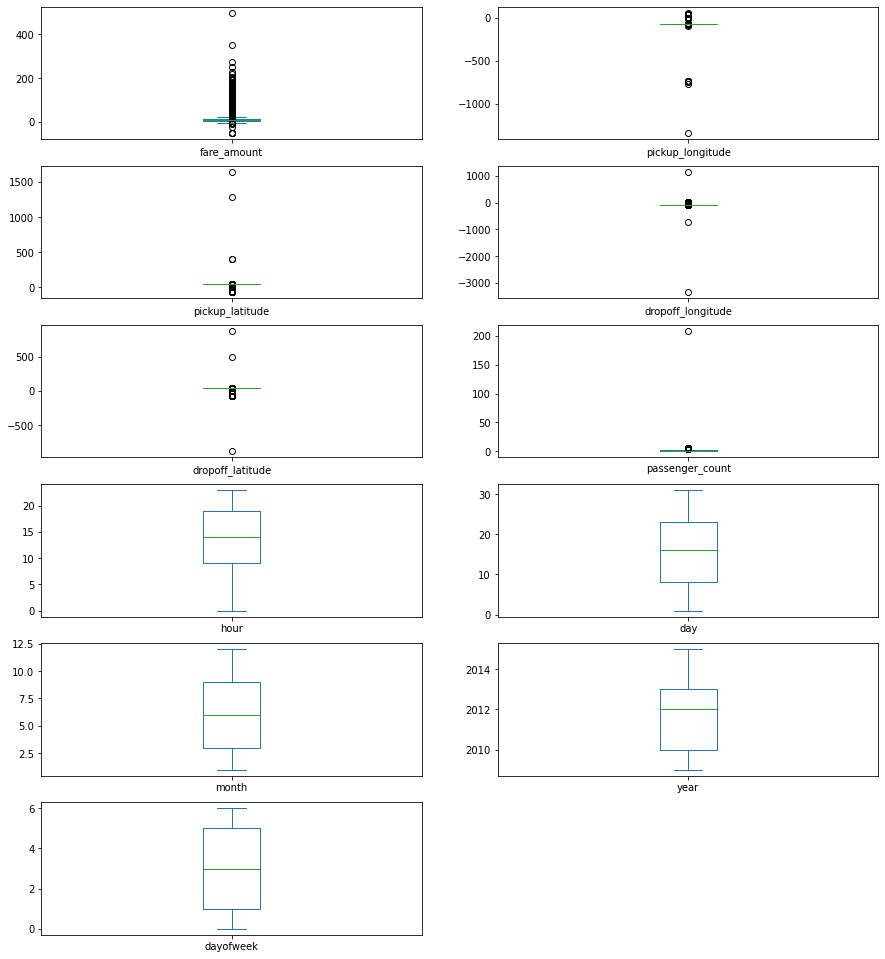

In [ ]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers

In [ ]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [ ]:
df = treat_outliers_all(df , df.iloc[: , 0::])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

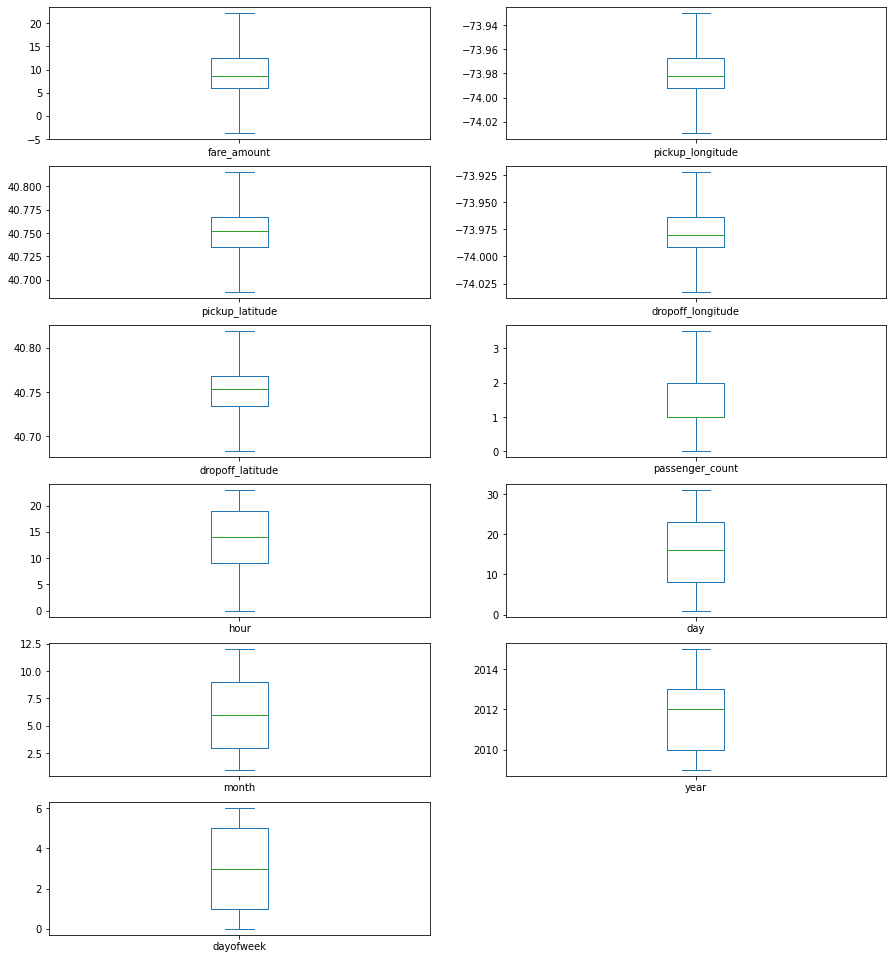

In [ ]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

In [ ]:
#!pip install haversine

In [ ]:
!pip install haversine
import haversine as hs  #Calculate the distance using Haversine to calculate the distance between to points. Can't use Eucladian as it is for flat surface.
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
        long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
        loc1=(lati1,long1)
        loc2=(lati2,long2)
        c = hs.haversine(loc1,loc2)
        travel_dist.append(c)
    
print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.929786        40.744085         -73.973082   

   dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  \
0         40.723217              1.0    19    7      5  2015          3   
1         40.750325              1.0    20   17      7  2009          4   
2         40.772647              1.0    21   24      8  2009          0   
3         40.803349              3.0     8   26      6  2009          4   
4         40.761247              3.5    17   28      8  2014          3   

   dist_travel_km  
0        1.683325  
1        2.457593  
2        5.036384  
3        1.661686  
4        4.116088

In [ ]:
travel_dist

[1.6833250775073447,
 2.4575932783467835,
 5.036384146783453,
 1.661685753650294,
 4.1160881895779955,
 0.0,
 9.529776771411873,
 0.7719995370784762,
 2.3327142314177545,
 4.889423641655177,
 2.2508607308770285,
 0.7719995370784762,
 0.3022521108558365,
 3.5812557740132496,
 1.3099517093917648,
 1.716279792276335,
 0.7299665570466272,
 2.515953547298386,
 1.790321726187665,
 1.0347050399795192,
 2.4902472008677727,
 0.9594701844599927,
 1.2613897673437817,
 1.7517650017211177,
 6.1932445014761095,
 2.736192584061414,
 0.7232537124105735,
 3.229443537425455,
 1.4295172964395384,
 2.233699311547041,
 11.081439278313375,
 1.8950491608266506,
 1.9049353402365328,
 3.1821178242889583,
 4.467427177611096,
 2.9230236888626995,
 1.200213842045202,
 2.635790807404098,
 2.253613903554444,
 9.186987668633932,
 4.826533532872274,
 1.2502926870845612,
 0.7984742276755328,
 0.840396152683202,
 0.38519924001701444,
 2.434346176233359,
 3.127909533264099,
 3.7346507724526368,
 0.0,
 4.504360509008704,

In [ ]:
#Uber doesn't travel over 130 kms so minimize the distance 
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (200000, 12)


In [ ]:
#Finding inccorect latitude (Less than or greater than 90) and longitude (greater than or less than 180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 180) |(df.dropoff_longitude < -180)
                                    ]

In [ ]:
incorrect_coordinates

Empty DataFrame
Columns: [fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, hour, day, month, year, dayofweek, dist_travel_km]
Index: []

In [ ]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [ ]:
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.929786        40.744085         -73.973082   

   dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  \
0         40.723217              1.0    19    7      5  2015          3   
1         40.750325              1.0    20   17      7  2009          4   
2         40.772647              1.0    21   24      8  2009          0   
3         40.803349              3.0     8   26      6  2009          4   
4         40.761247              3.5    17   28      8  2014          3   

   dist_travel_km  
0        1.683325  
1        2.457593  
2        5.036384  
3        1.661686  
4        4.116088

In [ ]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

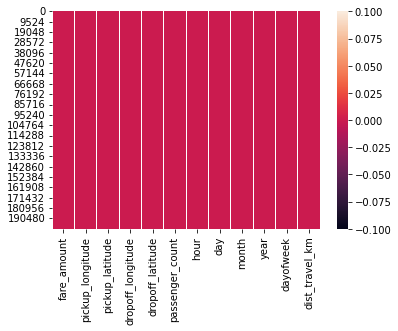

In [ ]:
sns.heatmap(df.isnull()) #Free for null values

In [ ]:
corr = df.corr() #Function to find the correlation

In [ ]:
corr

fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.154069        -0.110842   
pickup_longitude      0.154069          1.000000         0.259497   
pickup_latitude      -0.110842          0.259497         1.000000   
dropoff_longitude     0.218675          0.425619         0.048889   
dropoff_latitude     -0.125898          0.073290         0.515714   
passenger_count       0.015778         -0.013213        -0.012889   
hour                 -0.023623          0.011579         0.029681   
day                   0.004534         -0.003204        -0.001553   
month                 0.030817          0.001169         0.001562   
year                  0.141277          0.010198        -0.014243   
dayofweek             0.013652         -0.024652        -0.042310   
dist_travel_km        0.786385          0.048446        -0.073362   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                 0.218675         -0.125898         0.015778   
pickup_longitude            0.425619          0.073290        -0.013213   
pickup_latitude             0.048889          0.515714        -0.012889   
dropoff_longitude           1.000000          0.245667        -0.009303   
dropoff_latitude            0.245667          1.000000        -0.006308   
passenger_count            -0.009303         -0.006308         1.000000   
hour                       -0.046558          0.019783         0.020274   
day                        -0.004007         -0.003479         0.002712   
month                       0.002391         -0.001193         0.010351   
year                        0.011346         -0.009603        -0.009749   
dayofweek                  -0.003336         -0.031919         0.048550   
dist_travel_km              0.155191         -0.052701         0.009884   

                       hour       day     month      year  dayofweek  \
fare_amount       -0.023623  0.004534  0.030817  0.141277   0.013652   
pickup_longitude   0.011579 -0.003204  0.001169  0.010198  -0.024652   
pickup_latitude    0.029681 -0.001553  0.001562 -0.014243  -0.042310   
dropoff_longitude -0.046558 -0.004007  0.002391  0.011346  -0.003336   
dropoff_latitude   0.019783 -0.003479 -0.001193 -0.009603  -0.031919   
passenger_count    0.020274  0.002712  0.010351 -0.009749   0.048550   
hour               1.000000  0.004677 -0.003926  0.002156  -0.086947   
day                0.004677  1.000000 -0.017360 -0.012170   0.005617   
month             -0.003926 -0.017360  1.000000 -0.115859  -0.008786   
year               0.002156 -0.012170 -0.115859  1.000000   0.006113   
dayofweek         -0.086947  0.005617 -0.008786  0.006113   1.000000   
dist_travel_km    -0.035708  0.001709  0.010050  0.022294   0.030382   

                   dist_travel_km  
fare_amount              0.786385  
pickup_longitude         0.048446  
pickup_latitude         -0.073362  
dropoff_longitude        0.155191  
dropoff_latitude        -0.052701  
passenger_count          0.009884  
hour                    -0.035708  
day                      0.001709  
month                    0.010050  
year                     0.022294  
dayofweek                0.030382  
dist_travel_km           1.000000

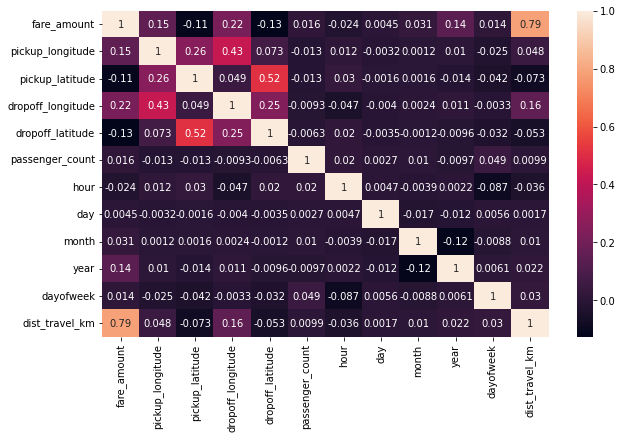

In [ ]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

### Dividing the dataset into feature and target values 

In [ ]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]

In [ ]:
y = df['fare_amount']

### Dividing the dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.40)

In [ ]:
X_train

pickup_longitude  pickup_latitude  dropoff_longitude  \
57138         -73.976421        40.779869         -73.980405   
83732         -73.976297        40.776014         -73.962865   
161110        -74.010165        40.721163         -73.977955   
160879        -73.929786        40.686252         -73.922036   
170357        -73.996807        40.753180         -73.969481   
...                  ...              ...                ...   
185398        -74.000513        40.732259         -73.954080   
100268        -73.989151        40.758196         -73.951786   
137712        -74.004172        40.752713         -73.975283   
125314        -73.961176        40.760675         -73.934870   
118212        -73.995255        40.740307         -73.983822   

        dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  \
57138          40.764858              1.0    14   11      6  2009          3   
83732          40.775779              2.0    10    4      3  2014          1   
161110         40.742354              1.0    22   23     11  2010          1   
160879         40.716476              1.0    23   24      7  2009          4   
170357         40.766789              1.0    18   19      4  2010          0   
...                  ...              ...   ...  ...    ...   ...        ...   
185398         40.773814              1.0     1    2     12  2014          1   
100268         40.774548              1.0    17    6     12  2010          0   
137712         40.762080              3.0    16   21      3  2009          5   
125314         40.798329              1.0    14   30      3  2009          0   
118212         40.751222              3.5    12   29      9  2014          0   

        dist_travel_km  
57138         1.702531  
83732         1.131339  
161110        3.594203  
160879        3.423629  
170357        2.754445  
...                ...  
185398        6.053811  
100268        3.634304  
137712        2.646817  
125314        4.736723  
118212        1.549422  

[120000 rows x 11 columns]

In [ ]:
X_test

pickup_longitude  pickup_latitude  dropoff_longitude  \
134196        -73.987653        40.733765         -73.977052   
107321        -73.929786        40.714081         -73.922036   
13240         -73.974477        40.787425         -73.977225   
116831        -73.999163        40.728143         -73.949858   
183602        -73.977793        40.752059         -73.972385   
...                  ...              ...                ...   
61897         -73.976624        40.759392         -73.991028   
86556         -73.982802        40.767117         -73.972877   
152969        -74.001008        40.747260         -73.995333   
101276        -73.970425        40.752853         -73.966725   
9988          -73.994767        40.750388         -73.997868   

        dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  \
134196         40.736000              1.0    12   30     10  2010          5   
107321         40.711754              2.0     1    8      4  2012          6   
13240          40.766052              3.5    20   11      5  2012          4   
116831         40.784386              1.0    22   18     12  2009          4   
183602         40.745199              1.0    11    2      1  2010          5   
...                  ...              ...   ...  ...    ...   ...        ...   
61897          40.750431              2.0    14   15      1  2015          3   
86556          40.762658              1.0     7    6      9  2012          3   
152969         40.740017              1.0     8   15      6  2010          1   
101276         40.756318              2.0     0   15      1  2011          5   
9988           40.751022              1.0     7   29      8  2012          2   

        dist_travel_km  
134196        0.927134  
107321        0.702577  
13240         2.387810  
116831        7.507245  
183602        0.888483  
...                ...  
61897         1.569990  
86556         0.971862  
152969        0.936600  
101276        0.495560  
9988          0.270564  

[80000 rows x 11 columns]

In [ ]:
y_train

57138      6.5
83732      8.0
161110    10.1
160879    19.7
170357    11.3
          ... 
185398    15.0
100268    10.1
137712    10.5
125314     8.9
118212    10.0
Name: fare_amount, Length: 120000, dtype: float64

In [ ]:
y_test

134196     5.3
107321     4.9
13240      8.5
116831    16.1
183602     6.1
          ... 
61897      7.0
86556      5.5
152969     4.1
101276     4.1
9988       3.3
Name: fare_amount, Length: 80000, dtype: float64

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
regression.intercept_ #To find the linear intercept

3499.623309010513

In [ ]:
regression.coef_ #To find the linear coeeficient

array([ 2.51316039e+01, -7.20948877e+00,  1.84966874e+01, -1.75981555e+01,
        7.84141792e-02,  5.33961187e-03,  3.17665806e-03,  5.79340720e-02,
        3.69417645e-01, -2.56622531e-02,  1.84985339e+00])

In [ ]:
prediction = regression.predict(X_test) #To predict the target values

In [ ]:
print(prediction)

[6.24977447 9.19022518 9.01724798 ... 5.22743575 5.39493376 4.75727853]


In [ ]:
y_test

134196     5.3
107321     4.9
13240      8.5
116831    16.1
183602     6.1
          ... 
61897      7.0
86556      5.5
152969     4.1
101276     4.1
9988       3.3
Name: fare_amount, Length: 80000, dtype: float64

### Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error

In [ ]:
from sklearn.metrics import r2_score 

In [ ]:
r2_score(y_test,prediction)

0.6607775673986178

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y_test,prediction)

In [ ]:
MSE 

10.03977776039794

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

3.1685608342586606

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=50) #Here n_estimators means number of trees you want to build before making the prediction

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([5.372, 7.489, 8.036, ..., 4.848, 4.842, 4.606])

### Metrics evaluatin for Random Forest

In [ ]:
R2_Random = r2_score(y_test,y_pred)

In [ ]:
R2_Random

0.7895351491252469

In [ ]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [ ]:
MSE_Random

6.229011191723899

In [ ]:
RMSE_Random = np.sqrt(MSE_Random)

In [ ]:
RMSE_Random

2.4957987081741786